## Data Normalization

### Normalization and Scaling

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, preprocessing

In [15]:
# import iris dataset
iris = datasets.load_iris()
x = iris.data[:, [2, 3]]
y = iris.target

std_scale = preprocessing.StandardScaler().fit(x)
x_std = std_scale.transform(x)

minmax_scale = preprocessing.MinMaxScaler().fit(x)
x_minmax = minmax_scale.transform(x)

In [16]:
# display output
print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'
 .format(x[:,0].mean(), x[:,1].mean()))
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'
 .format(x[:,0].std(), x[:,1].std()))
print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'
 .format(x_std[:,0].mean(), x_std[:,1].mean()))
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'
 .format(x_std[:,0].std(), x_std[:,1].std()))
print('Min value before min-max scaling: patel length={:.1f}, patel width={:.1f}'
 .format(x[:,0].min(), x[:,1].min()))

print('Max value before min-max scaling: petal length={:.1f}, petal width={:.1f}'
 .format(x[:,0].max(), x[:,1].max()))
print('Min value after min-max scaling: patel length={:.1f}, patel width={:.1f}'
 .format(x_minmax[:,0].min(), x_minmax[:,1].min()))
print('Max value after min-max scaling: petal length={:.1f}, petal width={:.1f}'
 .format(x_minmax[:,0].max(), x_minmax[:,1].max()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=-0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0
Min value before min-max scaling: patel length=1.0, patel width=0.1
Max value before min-max scaling: petal length=6.9, petal width=2.5
Min value after min-max scaling: patel length=0.0, patel width=0.0
Max value after min-max scaling: petal length=1.0, petal width=1.0


### Univariate analysis

In [21]:
iris = datasets.load_iris()
# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species'])
# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica'))
# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
# check the frequency distribution for each category
print (iris['species'].value_counts())

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64


<Figure size 1080x576 with 0 Axes>

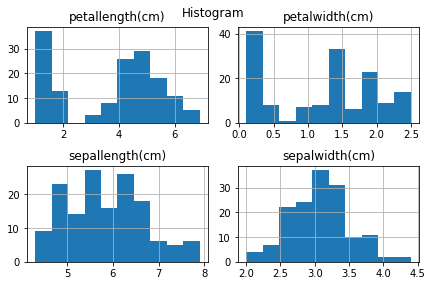

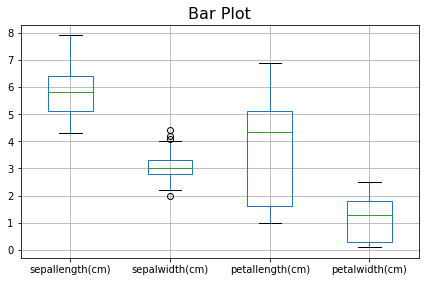

In [25]:
# visualization with pandas
# Set the size of the plot
plt.figure(figsize=(15,8))
iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=12) # use suptitle to add title to allsublots
plt.tight_layout(pad=1)
plt.show()
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.tight_layout(pad=1)
plt.show()

### Multivariate analysis

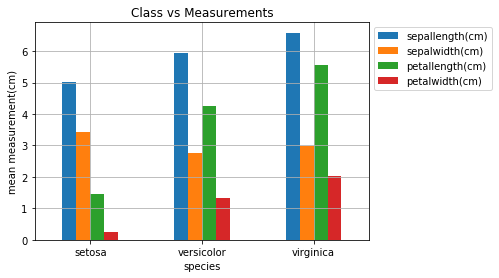

In [26]:
# print the mean for each column by species
iris.groupby(by = "species").mean()
# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)
# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

### Correlation matrix

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


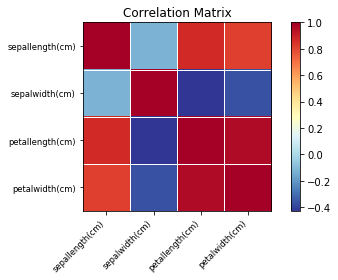

In [27]:
# create correlation matrix
corr = iris.corr()
print(corr)
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

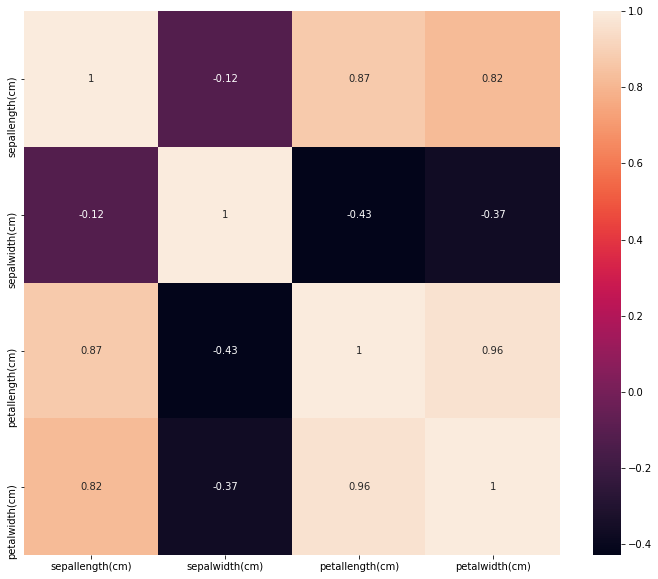

In [32]:
# using seaborn heatmap to plot correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True)

### Pair plot

Text(0.5, 0.98, 'Pair Plot')

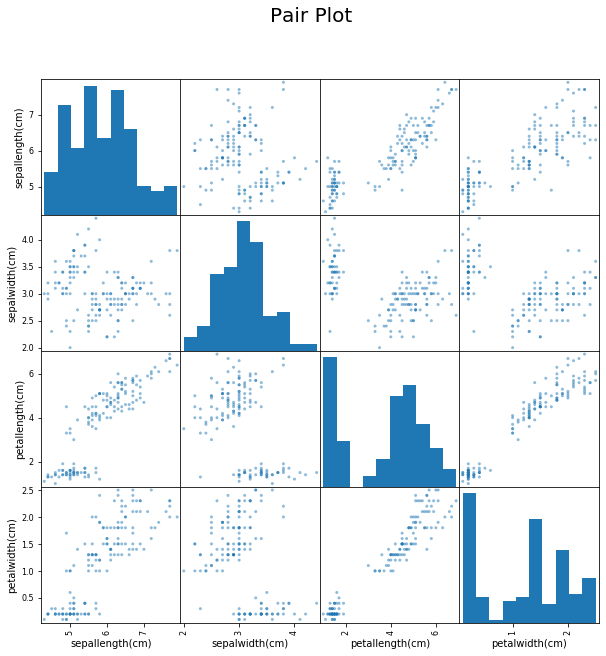

In [33]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, figsize=(10, 10))
# use suptitle to add title to all sublots
plt.suptitle("Pair Plot", fontsize=20)